In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from matplotlib import pyplot as plt


In [10]:
classifier = Sequential()

# 1st model

classifier.add(Convolution2D(512, (3, 3), input_shape=(64, 64, 3), activation='relu',strides=(3,3)))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Convolution2D(256, (2, 2), activation='relu'))

classifier.add(MaxPooling2D(pool_size=(1, 1)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))

classifier.add(Dense(units=2, activation='softmax'))

In [11]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 512)       14336     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 256)         524544    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                589888    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [16]:
training_set = train_datagen.flow_from_directory('Y:/2021/BUSINESS PROJECTS/COVID-19/VGG_with_XGBoost/dataset/train',
                                                 target_size=(64,64),
                                                 batch_size=12,
                                                 class_mode='categorical'
                                                 )


Found 4000 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Y:/2021/BUSINESS PROJECTS/COVID-19/VGG_with_XGBoost/dataset/test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical'
                                            )

Found 1000 images belonging to 2 classes.


In [19]:

history=classifier.fit_generator(training_set,steps_per_epoch =20,epochs =100,validation_data = test_set,verbose = 1)

Epoch 1/100
20/20 [==============================] - 33s 2s/step - loss: 0.5265 - accuracy: 0.7458 - val_loss: 0.5193 - val_accuracy: 0.7540
Epoch 2/100
20/20 [==============================] - 33s 2s/step - loss: 0.5343 - accuracy: 0.7042 - val_loss: 0.4994 - val_accuracy: 0.7530
Epoch 3/100
20/20 [==============================] - 33s 2s/step - loss: 0.5302 - accuracy: 0.7542 - val_loss: 0.4952 - val_accuracy: 0.7740
Epoch 4/100
20/20 [==============================] - 34s 2s/step - loss: 0.5936 - accuracy: 0.6875 - val_loss: 0.5086 - val_accuracy: 0.7480
Epoch 5/100
20/20 [==============================] - 34s 2s/step - loss: 0.5389 - accuracy: 0.7542 - val_loss: 0.4923 - val_accuracy: 0.7500
Epoch 6/100
20/20 [==============================] - 35s 2s/step - loss: 0.5470 - accuracy: 0.6917 - val_loss: 0.5130 - val_accuracy: 0.7560
Epoch 7/100
20/20 [==============================] - 35s 2s/step - loss: 0.5178 - accuracy: 0.7208 - val_loss: 0.4924 - val_accuracy: 0.7450
Epoch 8/100
2

In [39]:
classifier.save(r"Y:\2021\BUSINESS PROJECTS\COVID-19\VGG_with_XGBoost\CNNModel.h5")

C:\Users\ymts0258\AppData\Local\Temp/ipykernel_756/1501474251.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')


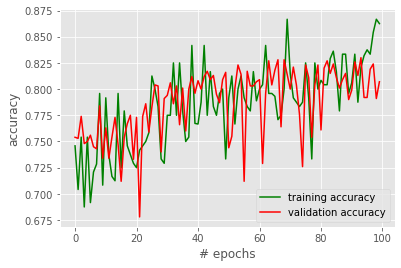

In [23]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy',color='red')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

C:\Users\ymts0258\AppData\Local\Temp/ipykernel_756/2174771187.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(history.history['loss'],'r',label='training loss',color='green')


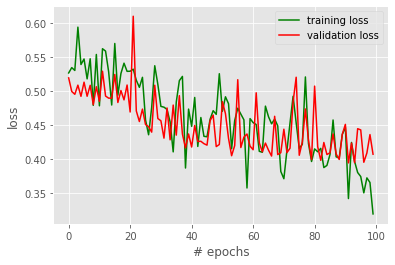

In [24]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss',color='red')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



In [38]:

acc=history.history['val_accuracy'][-1]
print(acc)

0.8069999814033508


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import load_model

In [36]:
mypath='Y:/2021/BUSINESS PROJECTS/COVID-19/VGG_with_XGBoost/dataset/train/COVID POSITIVE/covid_positive_1_2319.png'
new_model = load_model('CNNModel.h5')
test_image = image.load_img(mypath, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = new_model.predict(test_image)
classes=['Covid Negative', 'Covid Positive']
prediction=classes[np.argmax(result)]
print(prediction)

Covid Positive
